<a href="https://colab.research.google.com/github/vm20649/CE888/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from keras.applications.resnet50 import ResNet50

In [ ]:
os.listdir('Test')

['Fire', 'No_Fire']

In [ ]:
def assign_label(img,label):
    return label

In [ ]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
X=[]
Z=[]
IMG_SIZE=150
NOTFIRE='Test/No_Fire'
FIRE='Test/Fire'

make_train_data('NOTFIRE',NOTFIRE)
make_train_data('FIRE',FIRE)

100%|█████████████████████████████████████████████████████████████████████████████| 5137/5137 [00:44<00:00, 115.46it/s]


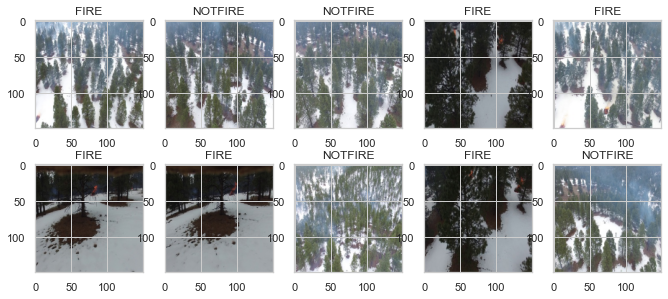

In [ ]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(10,10)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')



In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1337)

np.random.seed(42)
rn.seed(42)
#tf.set_random_seed(42)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='max')
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.20))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
epochs=100
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
base_model.trainable=True # setting the VGG model to be trainable.
model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 1026      
Total params: 30,408,066
Trainable params: 30,354,946
Non-trainable params: 53,120
_____________________________________

In [ ]:
History = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/100
154/154 [==============================] - 1007s 6s/step - loss: 0.6256 - accuracy: 0.8211 - val_loss: 0.1264 - val_accuracy: 0.9530
Epoch 2/100
154/154 [==============================] - 1000s 6s/step - loss: 0.0346 - accuracy: 0.9854 - val_loss: 0.0173 - val_accuracy: 0.9927
Epoch 3/100
154/154 [==============================] - 989s 6s/step - loss: 0.0137 - accuracy: 0.9952 - val_loss: 0.0101 - val_accuracy: 0.9957
Epoch 4/100
154/154 [==============================] - 985s 6s/step - loss: 0.0079 - accuracy: 0.9971 - val_loss: 0.0048 - val_accuracy: 0.9982
Epoch 5/100
154/154 [==============================] - 983s 6s/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0057 - val_accuracy: 0.9988
Epoch 6/100
154/154 [==============================] - 981s 6s/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0056 - val_accuracy: 0.9982
Epoch 7/100
154/154 [==============================] - 981s 6s/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0027 - val_accurac

154/154 [==============================] - 977s 6s/step - loss: 5.4409e-06 - accuracy: 1.0000 - val_loss: 8.3266e-05 - val_accuracy: 1.0000
Epoch 57/100
154/154 [==============================] - 976s 6s/step - loss: 9.7388e-06 - accuracy: 1.0000 - val_loss: 1.1496e-04 - val_accuracy: 1.0000
Epoch 58/100
154/154 [==============================] - 987s 6s/step - loss: 2.8010e-06 - accuracy: 1.0000 - val_loss: 1.0888e-04 - val_accuracy: 1.0000
Epoch 59/100
154/154 [==============================] - 979s 6s/step - loss: 3.1230e-06 - accuracy: 1.0000 - val_loss: 3.8720e-04 - val_accuracy: 1.0000
Epoch 60/100
154/154 [==============================] - 978s 6s/step - loss: 2.4486e-06 - accuracy: 1.0000 - val_loss: 1.4513e-04 - val_accuracy: 1.0000
Epoch 61/100
154/154 [==============================] - 976s 6s/step - loss: 2.0411e-06 - accuracy: 1.0000 - val_loss: 5.9276e-05 - val_accuracy: 1.0000
Epoch 62/100
154/154 [==============================] - 974s 6s/step - loss: 2.4892e-05 - accur

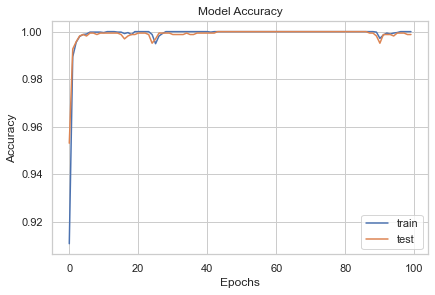

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


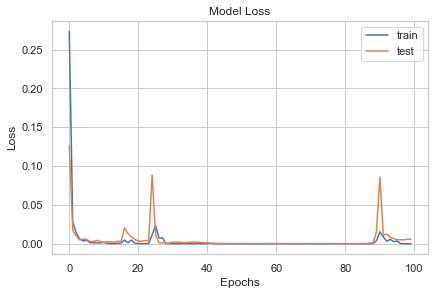

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
















.

